<a href="https://colab.research.google.com/github/andreeaiaconi/Thesis/blob/main/Thesis_data_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First I'll mount Google Drive- this is so I can download the dataset on the drive and can work directly with it from Google Colab, as my local hardware is limiting

In [36]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Then I'll copy the entire dataset + metadata into my drive

In [37]:
!git clone https://github.com/reutapel/MeeQA.git /content/drive/MyDrive/MeeQA


fatal: destination path '/content/drive/MyDrive/MeeQA' already exists and is not an empty directory.


Next I'll inspect the dataset structure

In [38]:
!ls /content/drive/MyDrive/MeeQA

Data  DataCreation  meeqa_gpu_env.yml  models  README.md


Point the code ONLY to Data/

In [39]:
BASE_PATH = "/content/drive/MyDrive/MeeQA/Data"



Now we check what's inside Data/

In [40]:
import os
os.listdir(BASE_PATH)


['1_pre_only_switch_speaker',
 '2_pre_only_switch_speaker',
 'only_switch_speaker',
 'original',
 'test_meetings.csv',
 'train_meetings.csv',
 'validation_meetings.csv']

In [41]:
import pandas as pd

train_csv = BASE_PATH + "/train_meetings.csv"
df_train = pd.read_csv(train_csv)

print(df_train.shape)    # number of rows and columns
print(df_train.columns)  # see what fields are available
df_train.head()          # preview first few rows


(293, 2)
Index(['Unnamed: 0', 'meeting_name'], dtype='object')


,Unnamed: 0,meeting_name
0,0,FOMC-Transcript-19770315
1,1,Bmr019
2,2,"January 21, 2012 - Institutional Advancement C..."
3,3,transcripts_20110519_auburn.pdf
4,4,Bed012


This shows that the Questions and answers themselves are not stored here. Now I will check the 'original' folder

In [42]:
from pathlib import Path
import json

# Pick a folder (e.g., 'original')
folder = Path(BASE_PATH) / "original"
list(folder.iterdir())  # see all files in this folder


[PosixPath('/content/drive/MyDrive/MeeQA/Data/original/test_data.json.zip'),
 PosixPath('/content/drive/MyDrive/MeeQA/Data/original/train_data.json.zip'),
 PosixPath('/content/drive/MyDrive/MeeQA/Data/original/validation_data.json.zip'),
 PosixPath('/content/drive/MyDrive/MeeQA/Data/original/test_data.json'),
 PosixPath('/content/drive/MyDrive/MeeQA/Data/original/train_data.json'),
 PosixPath('/content/drive/MyDrive/MeeQA/Data/original/validation_data.json')]

Unzipping the data:

In [43]:
import zipfile
from pathlib import Path

folder = Path(BASE_PATH) / "original"

for zip_file in folder.glob("*.zip"):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(folder)  # extract in the same folder


In [44]:
import json
from pathlib import Path

folder = Path("/content/drive/MyDrive/MeeQA/Data/original")
train_file = folder / "train_data.json"

with open(train_file) as f:
    train_data = json.load(f)

print("Top-level keys:", train_data.keys())



Top-level keys: dict_keys(['data'])


So train_data is a dictionary with one key 'data', which means the the JSON looks something like this:
```
{
  "data": [
    { "question": "...", "answer": "...", "context": "...", ... },
    { "question": "...", "answer": "...", "context": "...", ... },
    ...
  ]
}
```



In [45]:
examples = train_data['data']

print(f"Number of examples in train: {len(examples)}")
print("First example:")
print(examples[0])


Number of examples in train: 33687
First example:
{'title': '', 'context': "& SPEAKER_1: so moved. & SPEAKER_0: motion has been made and inaudibly seconded. & SPEAKER_0: any dissent? & SPEAKER_0: very well, now that we know who will handle the system open market account, or which reserve bank will handle it, we have to decide on the individuals who will perform the necessary functions. & SPEAKER_0: and we need to select a manager of the system open market account, a function presently performed by mr. holmes. & SPEAKER_0: we need to select a deputy manager for domestic operations, and the present incumbent is mr. sternlight. & SPEAKER_0: and we finally need to appoint a deputy manager for foreign operations, and this function is handled by mr. pardee. & SPEAKER_0: and revolution so far has not taken place ; here is your final opportunity to start a revolution. & SPEAKER_0: any suggestion for a change in the officialdom? & SPEAKER_1: unintelligible. & SPEAKER_1: seconded. & SPEAKER_0: m

In [46]:
print(examples[0].keys())


dict_keys(['title', 'context', 'answers', 'question', 'id', 'is_impossible', 'isQuestionComprehensible', 'isQuestionRelavent', 'isQuestionSelfContained', 'isQuestionYesNo'])


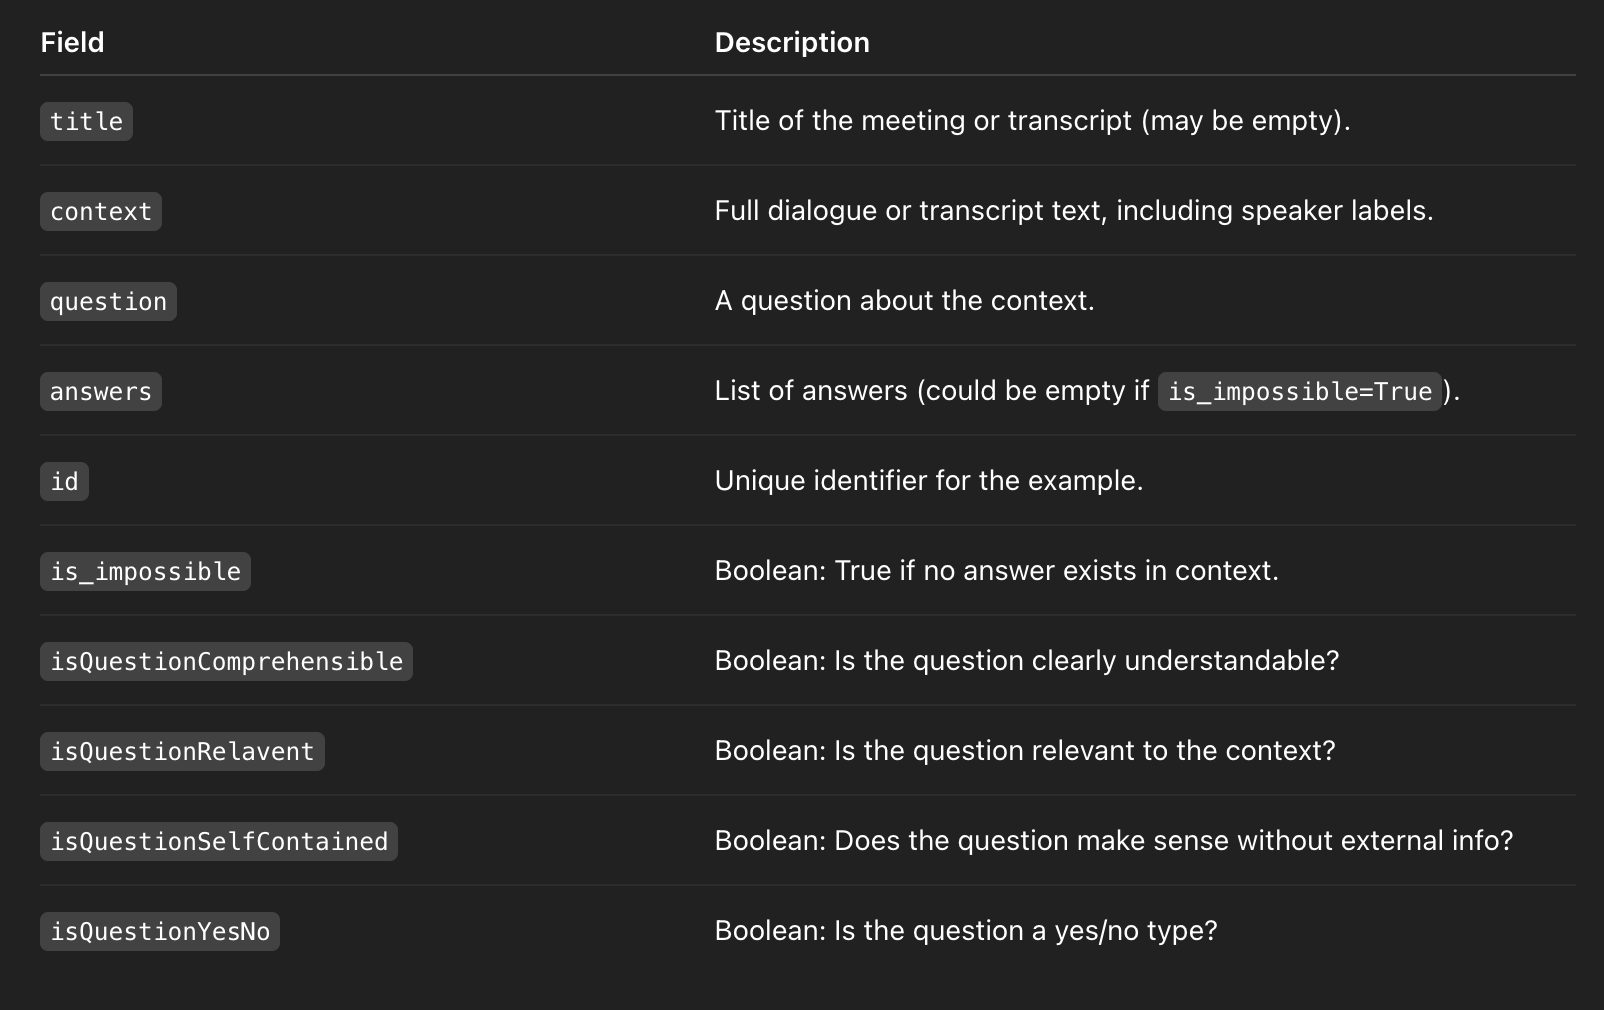

Now I will convert the MeeQA dataset to a Pandas DataFrame. This is a necessart standard because it transforms the raw JSON structure—nested dictionaries and lists—into a tabular format where each row represents an example and each column represents a field (like context, question, answers, is_impossible, etc.). This makes the dataset much easier to explore, filter, and analyse using familiar tools and syntax. I will be able to quickly inspect samples, perform statistics (e.g., count yes/no questions, impossible questions), and integrate the data seamlessly into machine learning pipelines or preprocessing workflows. Essentially, DataFrames turn complex hierarchical data into a structured, readable, and manipulable format, which is why they’re the de facto standard in NLP and data science workflows.

In [47]:
import pandas as pd

df_train = pd.DataFrame(examples)
df_train.head()


,title,context,answers,question,id,is_impossible,isQuestionComprehensible,isQuestionRelavent,isQuestionSelfContained,isQuestionYesNo
0,,& SPEAKER_1: so moved. & SPEAKER_0: motion has...,"{'text': ['so moved.'], 'answer_start': [13]}",& SPEAKER_0: is there a motion to that effect?,FOMC-Transcript-19770315200_661523,False,True,True,True,True
1,,& SPEAKER_1: so moved. & SPEAKER_0: motion has...,"{'text': ['so moved.'], 'answer_start': [13]}",& SPEAKER_0: is there a motion to that effect?,FOMC-Transcript-19770315200_961288,False,True,False,False,True
2,,"& SPEAKER_1: we have no such indication known,...","{'text': ['we have no such indication known, b...",& SPEAKER_0: do we have an indication that the...,FOMC-Transcript-19770315330_661523,False,True,True,True,True
3,,"& SPEAKER_1: we have no such indication known,...","{'text': ['we have no such indication known, b...",& SPEAKER_0: do we have an indication that the...,FOMC-Transcript-19770315330_722685,False,True,True,False,True
4,,"& SPEAKER_1: we have no such indication known,...","{'text': ['we have no such indication known, b...",& SPEAKER_0: do we have an indication that the...,FOMC-Transcript-19770315330_961288,False,True,True,True,True
